# Prediction Model for Flights

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
import pandas as pd 
import requests 
import seaborn as sns

C:\Users\AB\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('FlightDelays.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10915495 entries, 0 to 10915494
Data columns (total 50 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   CARRIER              object 
 7   FL_NUM               int64  
 8   Route                int64  
 9   ORIGIN               object 
 10  DEST                 object 
 11  DEST_CITY            object 
 12  DEST_STATE           object 
 13  CRS_DEP_TIME         int64  
 14  DEP_TIME             float64
 15  DEP_DELAY            float64
 16  DEP_DELAY_NEW        float64
 17  DEP_DEL15            float64
 18  DEP_DELAY_GROUP      float64
 19  DEP_TIME_BLK         object 
 20  TAXI_OUT             float64
 21  WHEELS_OFF           float64
 22  WHEELS_ON            float64
 23  TAXI_IN              float64
 

In [3]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915490,2019,2,6,27,4,2019-06-27,YX,4478,6671,XNA,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915491,2019,2,6,28,5,2019-06-28,YX,4506,6671,XNA,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915492,2019,2,6,28,5,2019-06-28,YX,4478,6671,XNA,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915493,2019,2,6,30,7,2019-06-30,YX,4506,6671,XNA,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52


In [4]:
df.isna().sum()

YEAR                          0
QUARTER                       0
MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
CARRIER                       0
FL_NUM                        0
Route                         0
ORIGIN                        0
DEST                          0
DEST_CITY                     0
DEST_STATE                    0
CRS_DEP_TIME                  0
DEP_TIME                 195282
DEP_DELAY                200219
DEP_DELAY_NEW            200219
DEP_DEL15                200219
DEP_DELAY_GROUP          200219
DEP_TIME_BLK                  0
TAXI_OUT                 200782
WHEELS_OFF               200781
WHEELS_ON                206390
TAXI_IN                  206390
CRS_ARR_TIME                  0
ARR_TIME                 206389
ARR_DELAY                232638
ARR_DELAY_NEW            232638
ARR_DEL15                232638
ARR_DELAY_GROUP          232638
ARR_TIME_BLK                  0
CANCELED

# Handling Missing values

In [3]:
df=df.dropna(subset=['ARR_DEL15'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682857 entries, 0 to 10915494
Data columns (total 50 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   CARRIER              object 
 7   FL_NUM               int64  
 8   Route                int64  
 9   ORIGIN               object 
 10  DEST                 object 
 11  DEST_CITY            object 
 12  DEST_STATE           object 
 13  CRS_DEP_TIME         int64  
 14  DEP_TIME             float64
 15  DEP_DELAY            float64
 16  DEP_DELAY_NEW        float64
 17  DEP_DEL15            float64
 18  DEP_DELAY_GROUP      float64
 19  DEP_TIME_BLK         object 
 20  TAXI_OUT             float64
 21  WHEELS_OFF           float64
 22  WHEELS_ON            float64
 23  TAXI_IN              float64
 

# Categorical Encoding for Nominal Variables

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.iloc[:,9] = labelencoder.fit_transform(df.iloc[:,9].values)
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)

In [8]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,0,3331,42,4,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,0,3940,42,4,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,0,3409,42,4,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,0,3940,42,4,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,0,3353,42,4,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915489,2019,2,6,27,4,2019-06-27,16,4506,6671,358,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915490,2019,2,6,27,4,2019-06-27,16,4478,6671,358,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915491,2019,2,6,28,5,2019-06-28,16,4506,6671,358,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52
10915493,2019,2,6,30,7,2019-06-30,16,4506,6671,358,...,NaN,NaN,NaN,3026.0,5831.0,311.0,6142.0,5987.0,21462.49,332085.52


In [9]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'CARRIER', 'FL_NUM', 'Route', 'ORIGIN', 'DEST', 'DEST_CITY',
       'DEST_STATE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'PASSENGERS', 'EMPFULL', 'EMPPART', 'EMPTOTAL',
       'EMPFTE', 'NET_INCOME', 'OP_REVENUES'],
      dtype='object')

In [15]:
df[['Route','DEST']].corr()

,Route,DEST
Route,1.000000,0.025666
DEST,0.025666,1.000000


In [6]:
#Imputing the missing values with 0 since the null values represent no delay
df=df.fillna(0)

In [7]:
df.isna().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
CARRIER                0
FL_NUM                 0
Route                  0
ORIGIN                 0
DEST                   0
DEST_CITY              0
DEST_STATE             0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DELAY_NEW          0
DEP_DEL15              0
DEP_DELAY_GROUP        0
DEP_TIME_BLK           0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DELAY_NEW          0
ARR_DEL15              0
ARR_DELAY_GROUP        0
ARR_TIME_BLK           0
CANCELED               0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0


# Converting features to numerical values to feed the algorithm

In [8]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(df['ARR_DELAY'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df[[ 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'CARRIER', 'FL_NUM', 'ORIGIN', 'DEST', 'TAXI_OUT',
       'WHEELS_OFF', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE', 'PASSENGERS', 'NET_INCOME', 'OP_REVENUES','AIR_TIME']]

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [9]:
features

array([[ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.8000000e+01],
       [ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.7000000e+01],
       [ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.8000000e+01],
       ...,
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.5700000e+02],
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.6400000e+02],
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.6600000e+02]])

In [10]:
labels

array([-12., -12.,  -6., ..., -16.,   4., 189.])

# Split data into training and testing sets

In [11]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7477999, 18)
Training Labels Shape: (7477999,)
Testing Features Shape: (3204858, 18)
Testing Labels Shape: (3204858,)


In [19]:
# # The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('ARR_DELAY')]

# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

ValueError: 'ARR_DELAY' is not in list

# Using RandomForestRegressor model to fit the data

In [13]:
# Import the model we are using
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 10, oob_score = True,
                           bootstrap = True,n_jobs=-1)

# Train the model on training data
rf.fit(train_features, train_labels)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(train_features, train_labels), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(test_features, test_labels)))
end = time.time()
print(f"{end-start} seconds")

C:\Users\AB\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


R^2 Training Score: 0.99 
OOB Score: 0.91 
R^2 Validation Score: 0.94
1009.1911025047302 seconds


# Perform the training using KFolds cross validation method

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cv_r2_scores_rf = cross_val_score(rf, features, labels, cv=5,scoring='r2',n_jobs=-1)
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6.4 degrees.


In [50]:
labels

array([-12., -12.,  -6., ..., -16.,   4., 189.])

In [52]:
predictions

array([-16.1, -12.8,  -8.6, ..., -16.4,  -5.1, 189.5])

In [89]:
true_data.head(15)

,date,ARR_DELAY
0,2018-01-01,-12.0
1,2018-01-01,-12.0
2,2018-01-02,-6.0
3,2018-01-02,-18.0
4,2018-01-03,-3.0
5,2018-01-03,-2.0
6,2018-01-04,27.0
7,2018-01-04,-19.0
8,2018-01-05,-4.0
9,2018-01-05,-7.0


In [88]:
predictions_data.head(15)

,date,prediction
0,2018-01-01,-16.1
1,2018-01-01,-12.8
2,2018-01-02,-8.6
3,2018-01-02,-18.2
4,2018-01-03,-3.6
5,2018-01-03,-0.7
6,2018-01-04,15.3
7,2018-01-04,-18.9
8,2018-01-05,-1.4
9,2018-01-05,-10.2


In [73]:
actual=true_data.head(100)
predicted=predictions_data.head(100)

Text(0.5, 1.0, 'Actual and Predicted Values')

C:\Users\AB\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


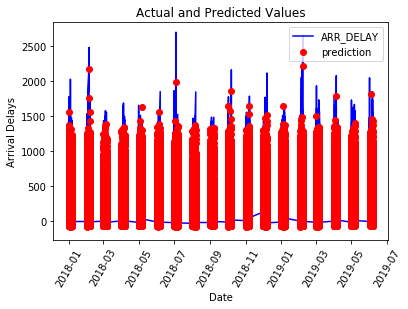

In [64]:
# from matplotlib.pyplot import figure
# figure(num=None,figsize=(40,10))
plt.plot(true_data['date'], true_data['ARR_DELAY'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Arrival Delays'); plt.title('Actual and Predicted Values')

Text(0.5, 1.0, 'Actual and Predicted Values')

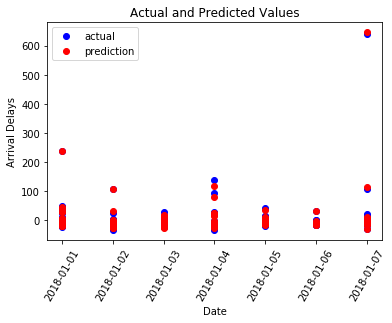

In [79]:
# from matplotlib.pyplot import figure
# figure(num=None,figsize=(40,10))
plt.plot(actual['date'], actual['ARR_DELAY'], 'bo', label = 'actual')
# Plot the predicted values
plt.plot(predicted['date'], predicted['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Arrival Delays'); plt.title('Actual and Predicted Values')

In [ ]:
labels

In [57]:
true_data = pd.DataFrame(data = {'date': dates, 'ARR_DELAY': labels})

In [58]:
predictions_data = pd.DataFrame(data = {'date': dates, 'prediction': predictions})

In [15]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CRS_DEP_TIME         Importance: 0.5944
Variable: WHEELS_OFF           Importance: 0.28046
Variable: TAXI_OUT             Importance: 0.04951
Variable: CRS_ARR_TIME         Importance: 0.02185
Variable: AIR_TIME             Importance: 0.01083
Variable: DISTANCE             Importance: 0.00646
Variable: PASSENGERS           Importance: 0.00538
Variable: FL_NUM               Importance: 0.00481
Variable: ORIGIN               Importance: 0.00464
Variable: DAY_OF_MONTH         Importance: 0.00404
Variable: DEST                 Importance: 0.00325
Variable: OP_REVENUES          Importance: 0.00295
Variable: NET_INCOME           Importance: 0.00274
Variable: MONTH                Importance: 0.0026
Variable: DAY_OF_WEEK          Importance: 0.00256
Variable: CARRIER              Importance: 0.00236
Variable: QUARTER              Importance: 0.00068
Variable: YEAR                 Importance: 0.00048


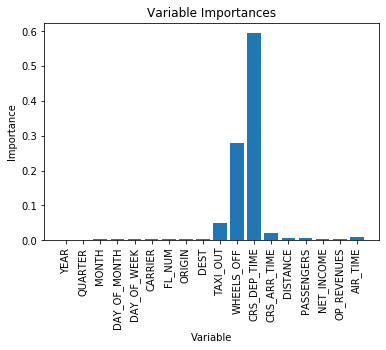

In [16]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Evaluating the nature of random forest through interpolation and extrapolation

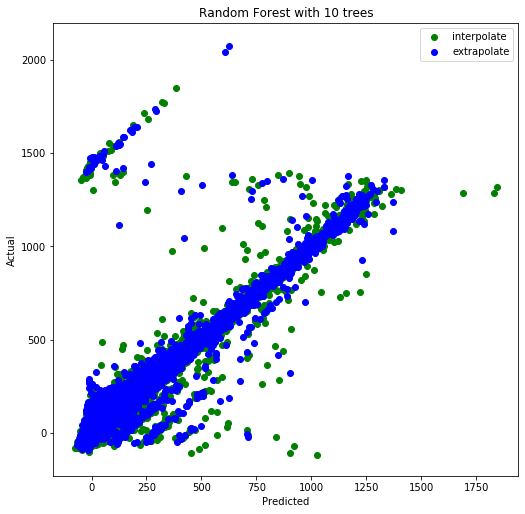

In [24]:
#plot RF as trees increase
#set starting point for subplots
index = 1
i=10
#set the size of the subplot to something large
plt.figure(figsize=(20,20))
# #iterate through number of trees in model
# #and plot predictions v actual
  #for i in [1,5,10]:
plt.subplot(2, 2, index)
#     RF_plot = RandomForestRegressor(n_estimators=i)
#     RF_plot.fit(X,y)
    #split data btw vals RF can interploate vs. data
    #it needs to exptrapolate
interpolate_index = test_features[:,0]<=2018
extrapolate_index = test_features[:,0]>2018
X_interpolate = test_features[interpolate_index]
X_extrapolate = test_features[extrapolate_index]
y_interpolate = test_labels[interpolate_index]
y_extrapolate = test_labels[extrapolate_index]
    #plot predictions vs. actual
plt.scatter(rf.predict(X_interpolate),
                y_interpolate,
                color="g",label="interpolate")
plt.scatter(rf.predict(X_extrapolate),
                y_extrapolate,
                color="b",label="extrapolate")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with {} trees'.format(i))
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.legend(loc="best")
index += 1

Plotting trees with max_depth=3

In [27]:
# Limit depth of tree to 3 levels
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3,n_jobs=-1)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [31]:
features

array([[ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.8000000e+01],
       [ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.7000000e+01],
       [ 2.0180000e+03,  1.0000000e+00,  1.0000000e+00, ...,
        -1.2637000e+02,  6.7425000e+02,  3.8000000e+01],
       ...,
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.5700000e+02],
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.6400000e+02],
       [ 2.0190000e+03,  2.0000000e+00,  6.0000000e+00, ...,
         2.1462490e+04,  3.3208552e+05,  1.6600000e+02]])

In [18]:
plt.rcParams['agg.path.chunksize'] = 10000

In [39]:
feature_list

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'CARRIER',
 'FL_NUM',
 'ORIGIN',
 'DEST',
 'TAXI_OUT',
 'WHEELS_OFF',
 'CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'DISTANCE',
 'PASSENGERS',
 'NET_INCOME',
 'OP_REVENUES',
 'AIR_TIME']

Text(0.5, 1.0, 'Actual and Predicted Values')

C:\Users\AB\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


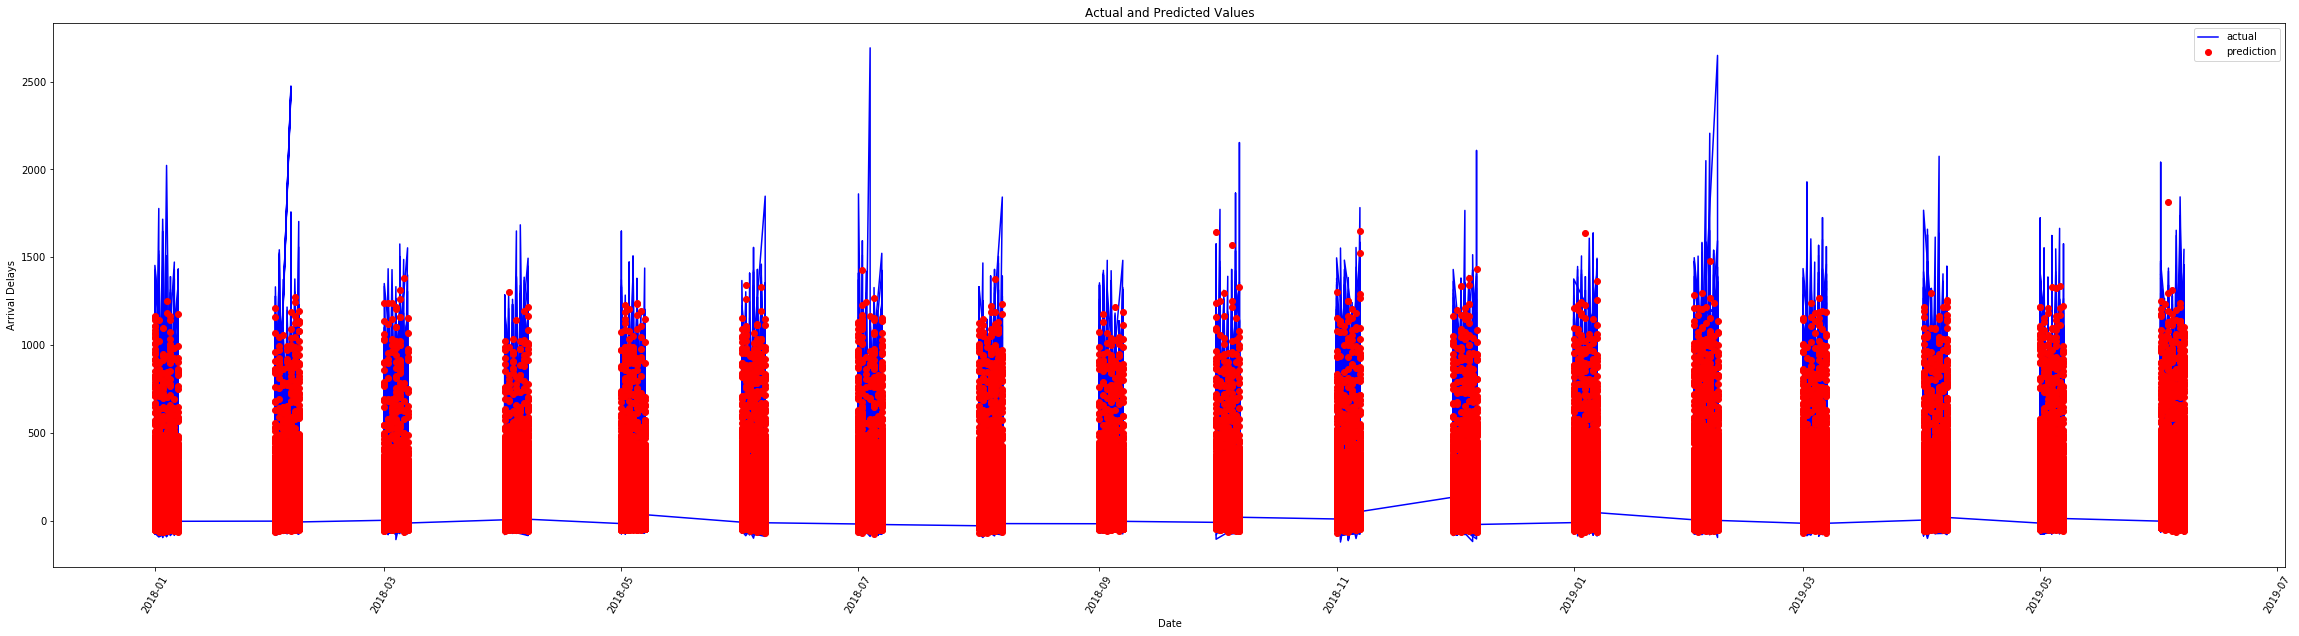

In [35]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('MONTH')]
days = features[:, feature_list.index('DAY_OF_WEEK')]
years = features[:, feature_list.index('YEAR')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'ARR_DELAY': labels})
#Dates of predictions
months = test_features[:, feature_list.index('MONTH')]
days = test_features[:, feature_list.index('DAY_OF_WEEK')]
years = test_features[:, feature_list.index('YEAR')]
# Column of dates
test_dates = [str(int(YEAR)) + '-' + str(int(MONTH)) + '-' + str(int(DAY_OF_WEEK)) for YEAR, MONTH, DAY_OF_WEEK in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
from matplotlib.pyplot import figure
figure(num=None,figsize=(40,10))
plt.plot(true_data['date'], true_data['ARR_DELAY'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Arrival Delays'); plt.title('Actual and Predicted Values')

In [ ]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('MONTH')]
days = features[:, feature_list.index('DAY_OF_WEEK')]
years = features[:, feature_list.index('YEAR')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'ARR_DELAY': labels})
#Dates of predictions
months = test_features[:, feature_list.index('MONTH')]
days = test_features[:, feature_list.index('DAY_OF_WEEK')]
years = test_features[:, feature_list.index('YEAR')]
# Column of dates
test_dates = [str(int(YEAR)) + '-' + str(int(MONTH)) + '-' + str(int(DAY_OF_WEEK)) for YEAR, MONTH, DAY_OF_WEEK in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
from matplotlib.pyplot import figure
figure(num=None,figsize=(40,10))
plt.plot(true_data['date'], true_data['ARR_DELAY'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Arrival Delays'); plt.title('Actual and Predicted Values')

In [33]:
len(test_labels)

3204858

In [65]:
feature_list

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'CARRIER',
 'FL_NUM',
 'ORIGIN',
 'DEST',
 'TAXI_OUT',
 'WHEELS_OFF',
 'CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'DISTANCE',
 'PASSENGERS',
 'NET_INCOME',
 'OP_REVENUES',
 'AIR_TIME']

In [58]:
feature_list

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'CARRIER',
 'FL_NUM',
 'ORIGIN',
 'DEST',
 'TAXI_OUT',
 'WHEELS_OFF',
 'CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'DISTANCE',
 'PASSENGERS',
 'NET_INCOME',
 'OP_REVENUES',
 'AIR_TIME']

In [21]:
true_data

,date,ARR_DELAY
0,2018-01-01,-12.0
1,2018-01-01,-12.0
2,2018-01-02,-6.0
3,2018-01-02,-18.0
4,2018-01-03,-3.0
...,...,...
10682852,2019-06-04,-14.0
10682853,2019-06-04,-7.0
10682854,2019-06-05,-16.0
10682855,2019-06-07,4.0


# MODEL SAVED AND TESTED ON WHOLE DATASET WITH BELOW TESTING ACCURACY

In [29]:
# save the model to disk
import pickle
filename = 'forestmodel_flightdelay.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_features, test_labels)
print(result)

0.9354754184484707
